# Flanger DQAF

The proposed blueprint for automated DQAF for statistical and computational biases in data. The blueprint docs are available [here](https://docs.google.com/document/d/17_8Nifh7VPjZB_C6swgxp6G0DSfryZWdpwxDIkOavMM/edit?usp=sharing).

## 1. Data Ingestion and Preprocessing

### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Loading the dataset

We can ensure data format standardization and data type validation by loading the data into a pandas dataframe and utf-8 encoding.

In [4]:
df = pd.read_csv('dataset\Bank_Personal_Loan_Modelling.csv', encoding='utf-8')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Next, we ensure the correct data types for each column.

In [5]:
df = df.astype({
    'ID': 'int64',
    'Age': 'int64',
    'Experience': 'int64',
    'Income': 'float64',
    'ZIP Code': 'int64',
    'Family': 'int64',
    'CCAvg': 'float64',
    'Education': 'int64',
    'Mortgage': 'float64',
    'Personal Loan': 'int64',
    'Securities Account': 'int64',
    'CD Account': 'int64',
    'Online': 'int64',
    'CreditCard': 'int64'
})
df.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### 1.3 Handle Missing Values

In [6]:
# Calculate the percentage of missing values in each feature
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: float64)

This dataset has no missing values. However, we can handle missing values by utilizing the MICE algorithm or by imputing the missing values with the mean, median, or mode.

Text(0.5, 1.0, 'Original Income Distribution')

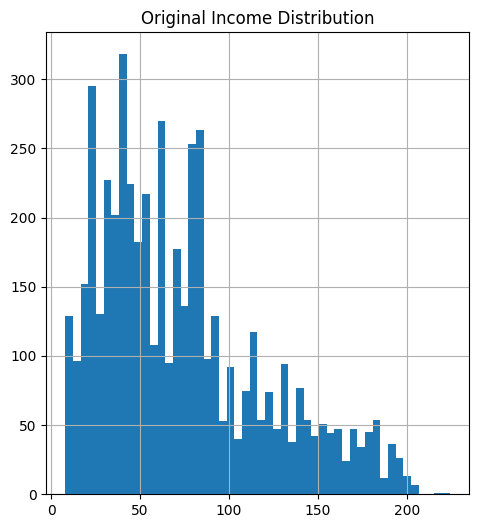

In [7]:
# Sample MICE algorithm to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the IterativeImputer class
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit the imputer on the dataset
mice_imputer.fit(df)

# Impute the missing values in the dataset
df_imputed = mice_imputer.transform(df)

# Convert the Numpy array back into a Pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Check for missing values in the imputed DataFrame
missing_values = df_imputed.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values

Text(0.5, 1.0, 'Original Income Distribution')

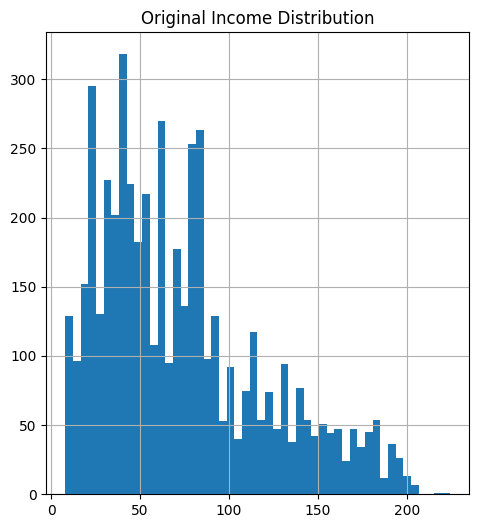

In [8]:
# Check the distribution of the 'Income' feature before and after imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Income'].hist(bins=50)
plt.title('Original Income Distribution')
